In [97]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
import statsmodels.formula.api as smf

mpl.rcParams["figure.dpi"] = 300
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [98]:
jobs = pd.read_csv('../data/jobs_clean.csv')

In [99]:
jobs

,Title,Responsibilities,Seniority,Employment_Type,Category,Address,Salary_Min,Salary_Max
0,Job: Data Scientist (Ai / Ml ) - Contract,Roles & ResponsibilitiesRoles & Responsibiliti...,Professional,Contract,Information Technology,Islandwide,5 000,8 000
1,Job: Senior Data Scientist (Ai / Ml ) - Contract,Roles & ResponsibilitiesRoles & Responsibiliti...,Professional,Contract,Information Technology,Islandwide,6 500,9 500
2,Senior Data Scientist,Roles & ResponsibilitiesJob Summary\nCredit ev...,Professional,Permanent,Information Technology,"CAPITAL TOWER, 168 ROBINSON ROAD 068912",6 000,12 000
3,Data Scientist (Bank) (Jt),"Roles & Responsibilities1, Involved in buildin...",Professional,Contract,"Banking and Finance, Information Technology",Islandwide,7 000,8 000
4,Lead Data Scientist,Roles & ResponsibilitiesRoles & Responsibiliti...,Professional,Permanent,Information Technology,"OUE DOWNTOWN, 6 SHENTON WAY 068809",5 000,6 000
...,...,...,...,...,...,...,...,...
674,Fast Talent,Roles & ResponsibilitiesRoles & Responsibiliti...,Professional,Permanent,Others,"ONE MARINA BOULEVARD, 1 MARINA BOULEVARD 018989",5 000,10 000
675,Head Of Business Development & Client Manageme...,Roles & ResponsibilitiesRhino Partners is a cu...,Senior Management,Permanent,Information Technology,11 IRVING PLACE 369551,7 500,8 000
676,Solution Architect Smart Mfg & Ai,"Roles & ResponsibilitiesAs the Lead, Solution ...",Junior Executive,Permanent,Engineering,"F10W Woodlands, Singapore \t 738799",7 000,14 000
677,Solution Architect Smart Mfg & Ai,"Roles & ResponsibilitiesAs the Lead, Solution ...",Junior Executive,Permanent,Engineering,"F10W Woodlands, Singapore \t 738799",5 000,10 000


### 1. VISUALISING KEY COLUMNS

### 1.1 SALARY INFO

In [100]:
jobs['Salary_Min'].value_counts().head(10)

4 000     71
5 000     70
6 000     60
8 000     50
10 000    45
7 000     41
6 500     32
9 000     28
4 500     26
3 000     26
Name: Salary_Min, dtype: int64

In [101]:
jobs['Salary_Max'].value_counts().head(10)

9 000     57
10 000    54
8 000     53
20 000    44
12 000    37
7 000     35
6 000     32
15 000    19
11 000    18
16 000    17
Name: Salary_Max, dtype: int64

### 1.2 MOST FREQUENTLY USED JOB TITLE, SENIORITY IN JOB POSTINGS
Unsurprisingly, "data scientist" was the most popular job title. But it accounted for only 6% of the 812 job titles in the dataset, reflecing the wide range of titles HR departments slap on such positions. Meanwhile, the most commonly used terms to describe the desired level of seniority were "professional", "executive" and "manager". It is hard, however, to discern if there are any differences between these terms, which are often used loosely and interchangeably in the job market.

In [102]:
jobs['Title'].value_counts().head()

Data Scientist           37
Senior Data Scientist    18
Data Engineer            17
Data Analyst              7
Senior Data Engineer      6
Name: Title, dtype: int64

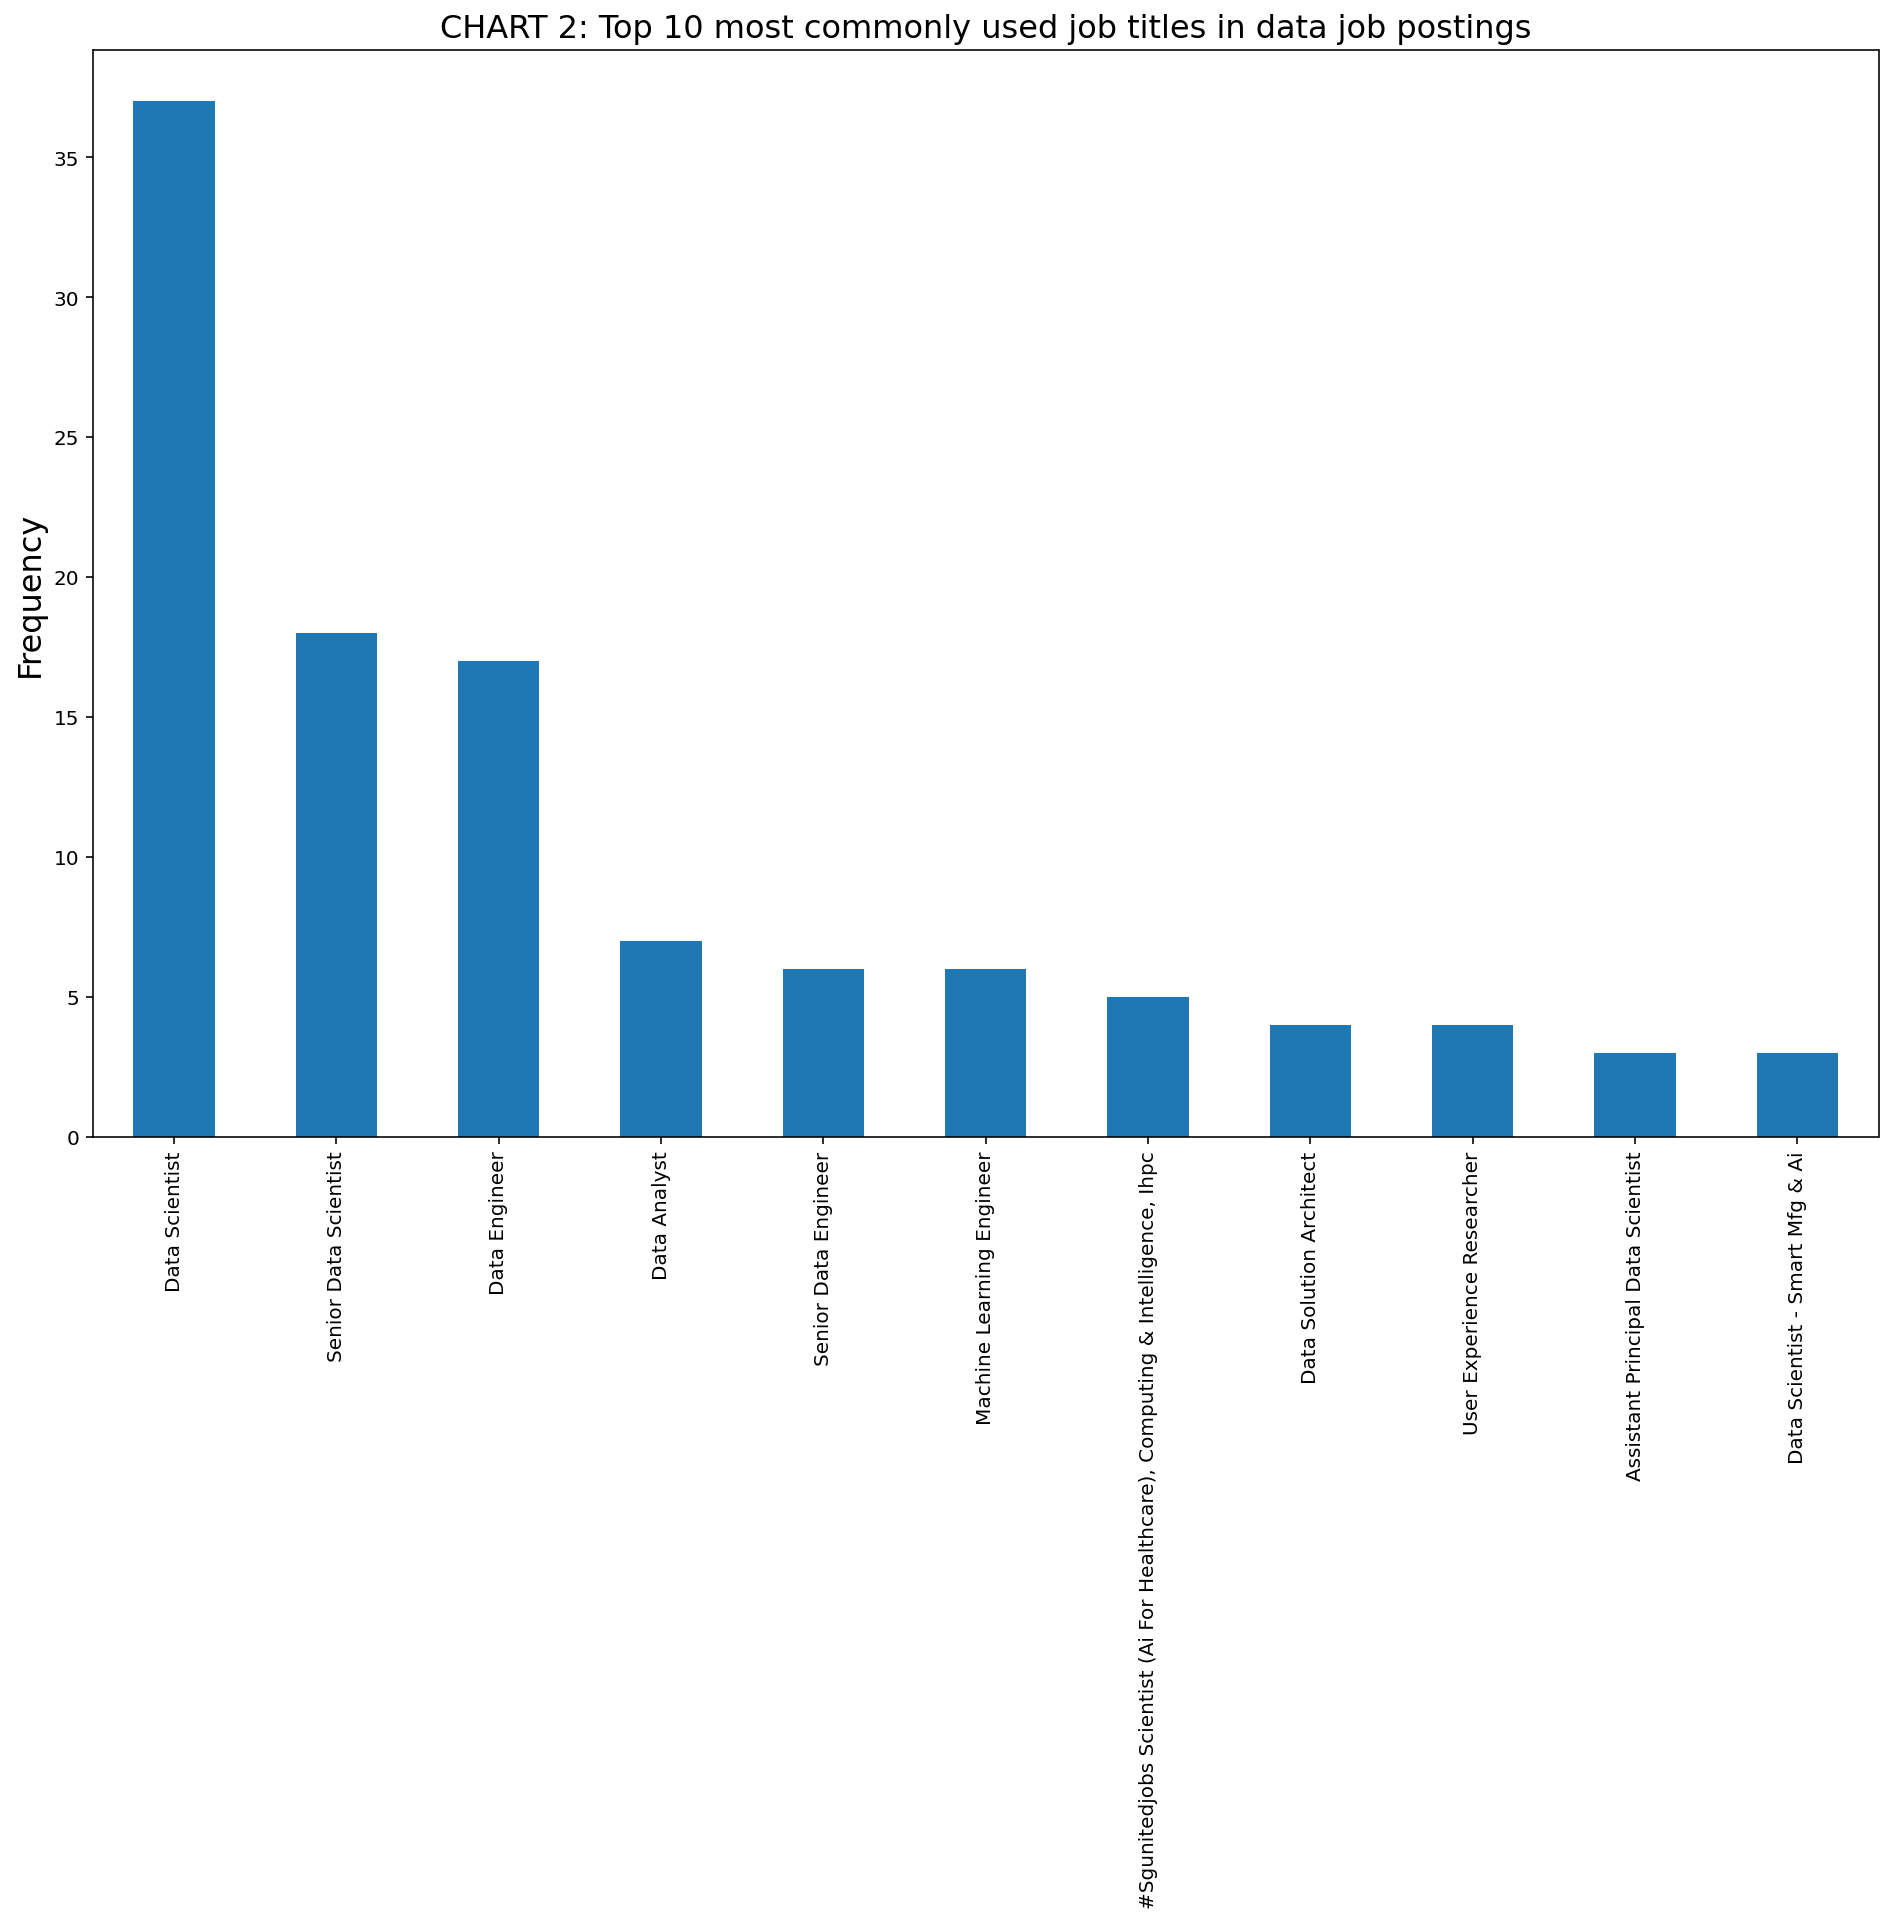

In [103]:
jobs["Title"].value_counts().plot(kind="bar", figsize=(16, 10))
plt.title(
    "CHART 2: Top 10 most commonly used job titles in data job postings", fontsize=16
)
plt.ylabel('Frequency', fontsize=16)
plt.xlim(-0.5, 10.5)
plt.show()

In [104]:
jobs['Seniority'].value_counts()

Professional         257
Executive            117
Manager               90
Senior Executive      90
Middle Management     30
Senior Management     29
Junior Executive      26
Entry Level           22
Non-executive         17
Name: Seniority, dtype: int64

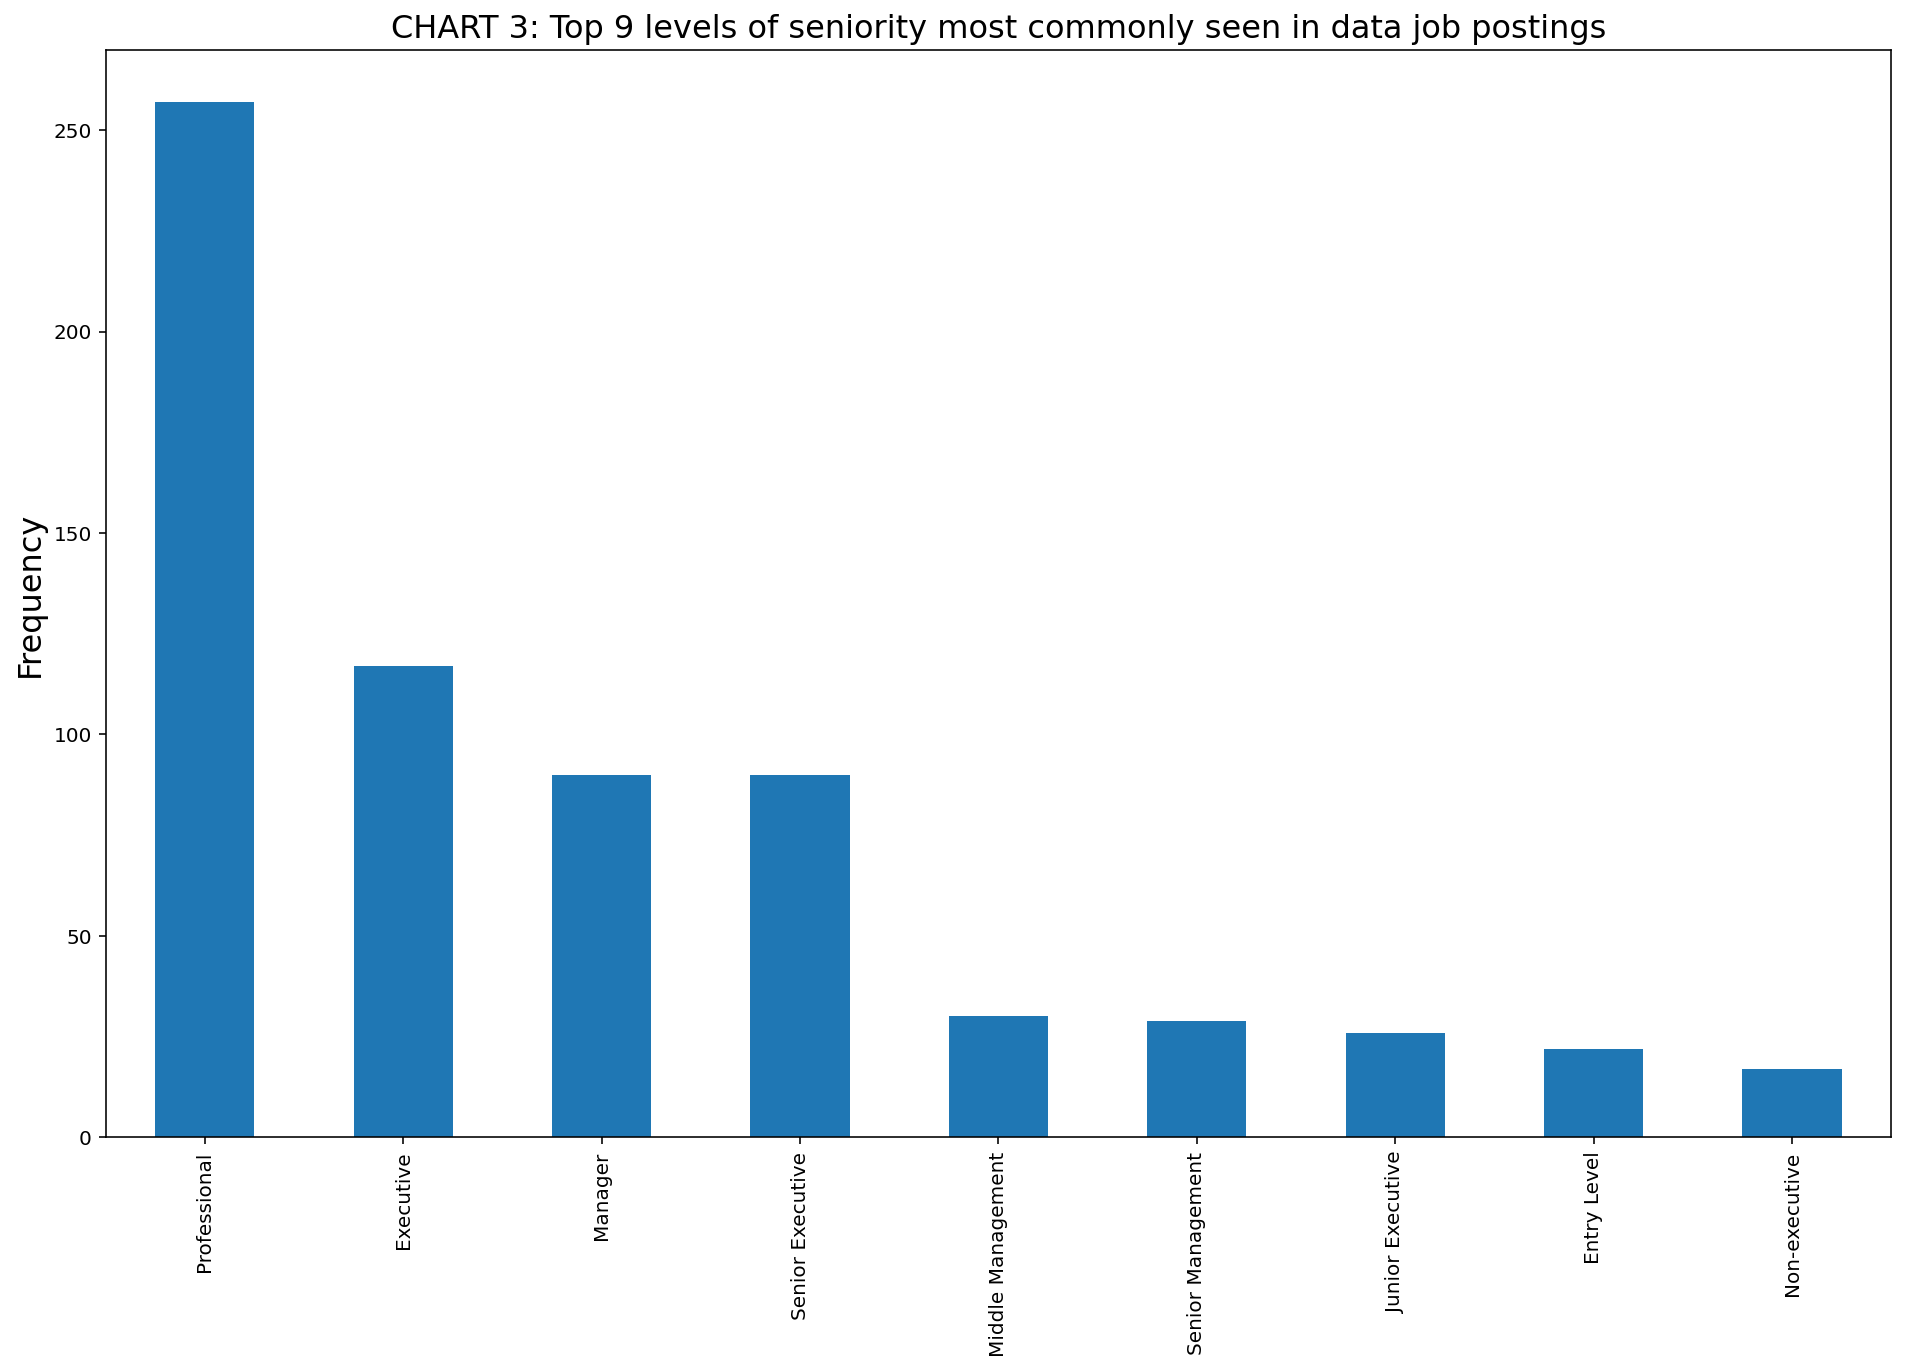

In [105]:
jobs["Seniority"].value_counts().plot(kind="bar", figsize=(16, 10))
plt.title(
    "CHART 3: Top 9 levels of seniority most commonly seen in data job postings", fontsize=16
)
plt.ylabel('Frequency', fontsize=16)
plt.show()

### 1.3 MOST FREQUENTLY OFFERED EMPLOYMENT CONDITIONS AND CATEGORIES CITED
Employers, who mostly identify themselves as being in the IT and research sectors, are predominantly looking for permanent staff. Internships and temporary or contract work are in the obvious minority, reflecting the nature of the work - which deals with sensitive data that a company would not share readily with non-fulltime staff.

In [106]:
jobs['Employment_Type'].value_counts()

Permanent                         544
Contract                          122
Contract, Permanent, Full Time      7
Temporary, Contract                 3
Internship/Attachment               2
Name: Employment_Type, dtype: int64

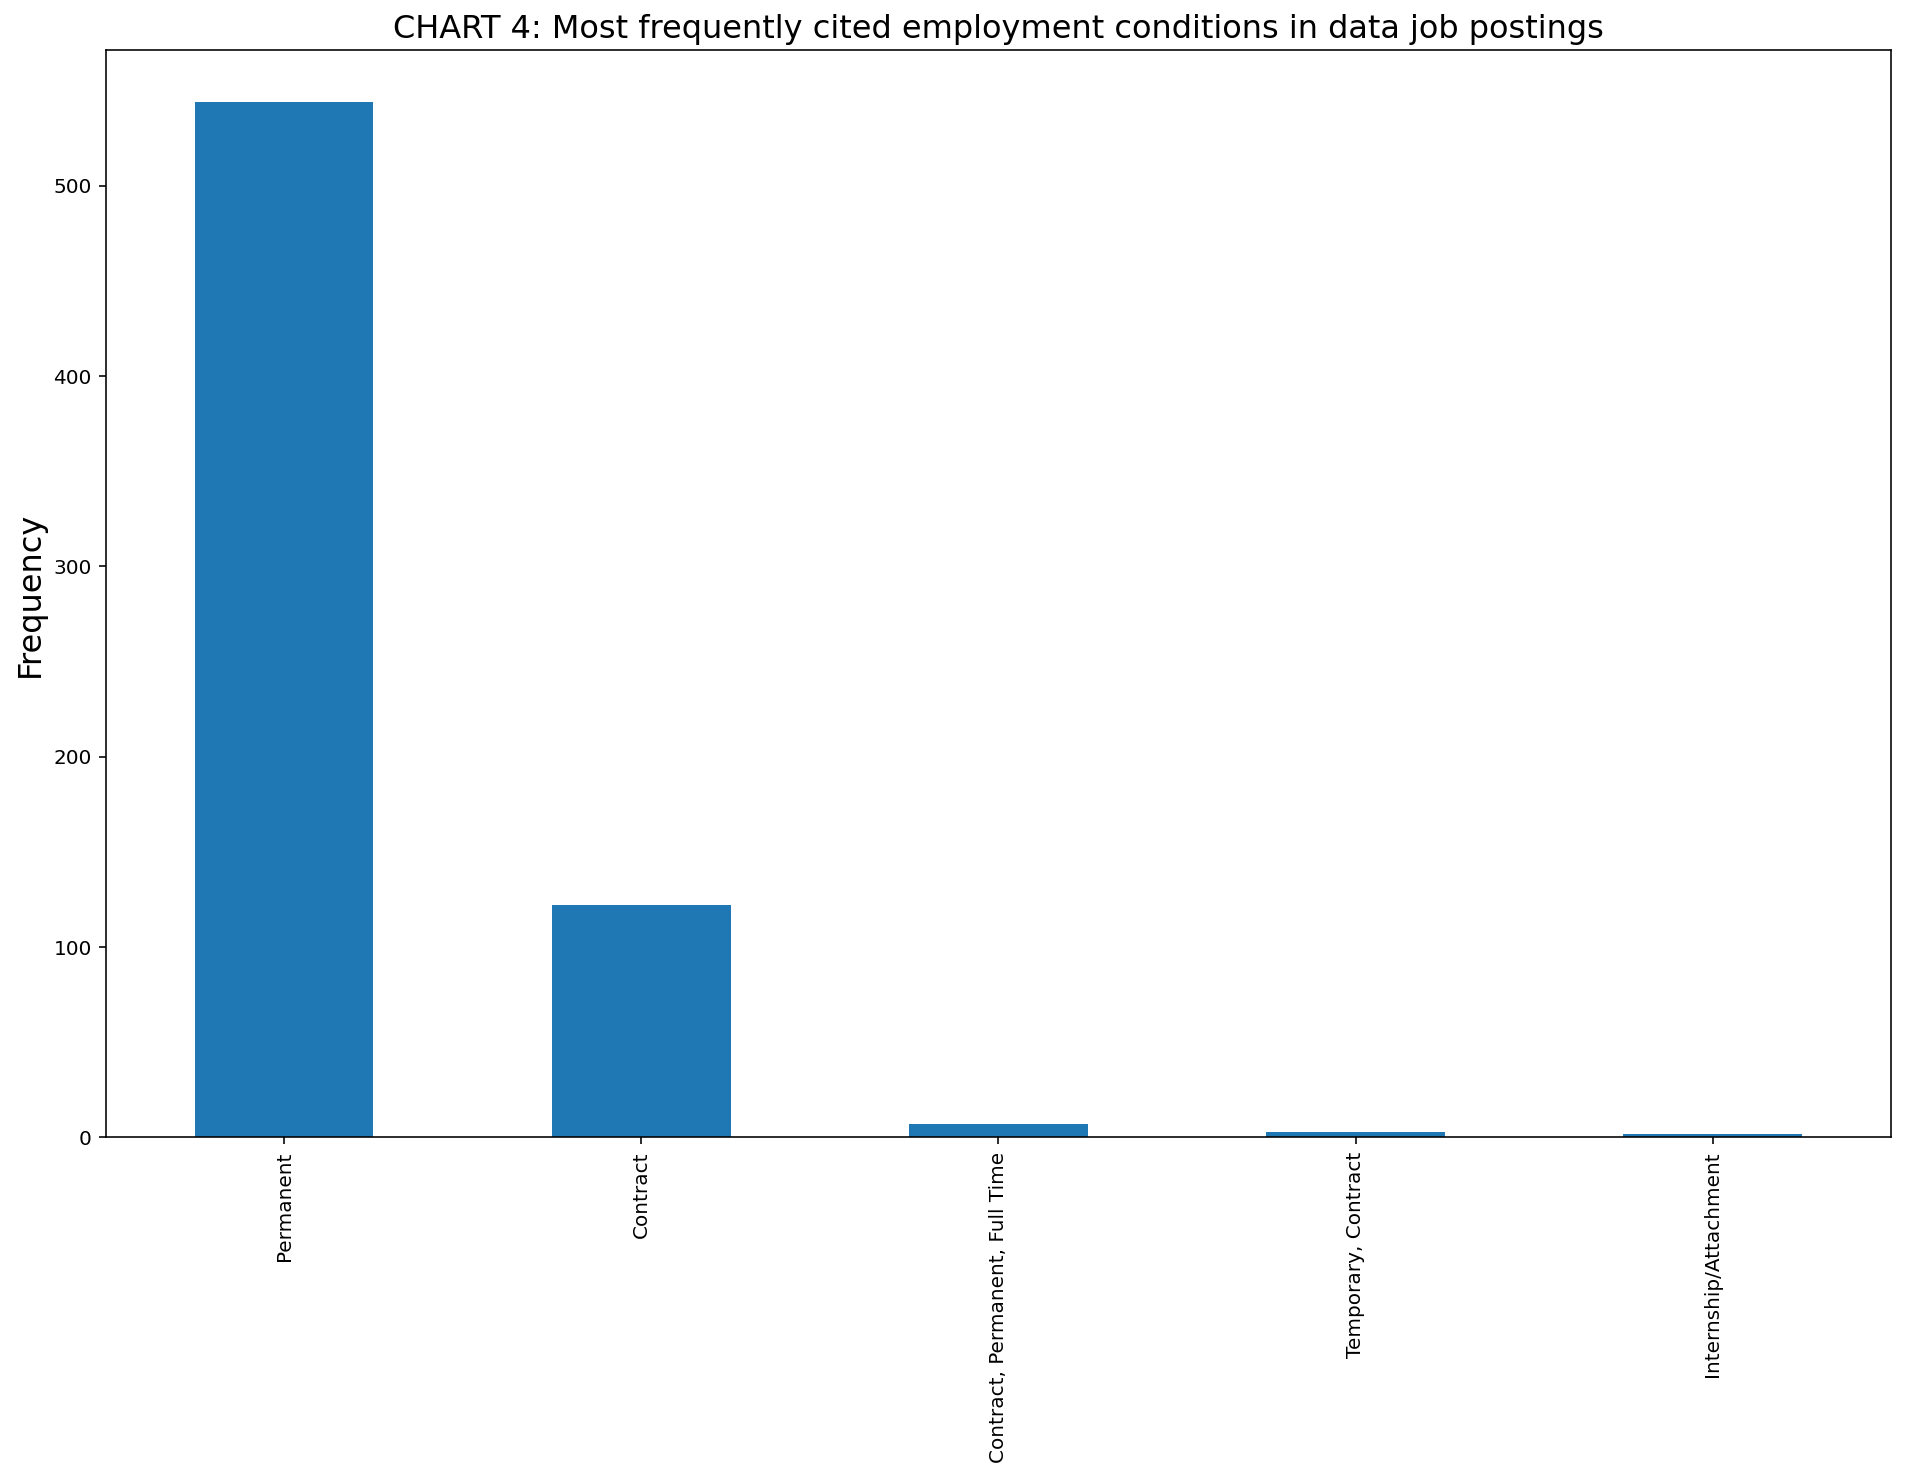

In [107]:
jobs["Employment_Type"].value_counts().plot(kind="bar", figsize=(16, 10))
plt.title(
    "CHART 4: Most frequently cited employment conditions in data job postings", fontsize=16
)
plt.ylabel('Frequency', fontsize=16)
plt.show()

In [108]:
jobs['Category'].value_counts().head(10)

Information Technology                                      268
Sciences / Laboratory / R&D                                  62
Banking and Finance                                          47
Engineering                                                  44
Others                                                       20
Banking and Finance, Information Technology                  20
Engineering, Information Technology                          20
Education and Training                                        9
Consulting                                                    9
Healthcare / Pharmaceutical, Sciences / Laboratory / R&D      9
Name: Category, dtype: int64

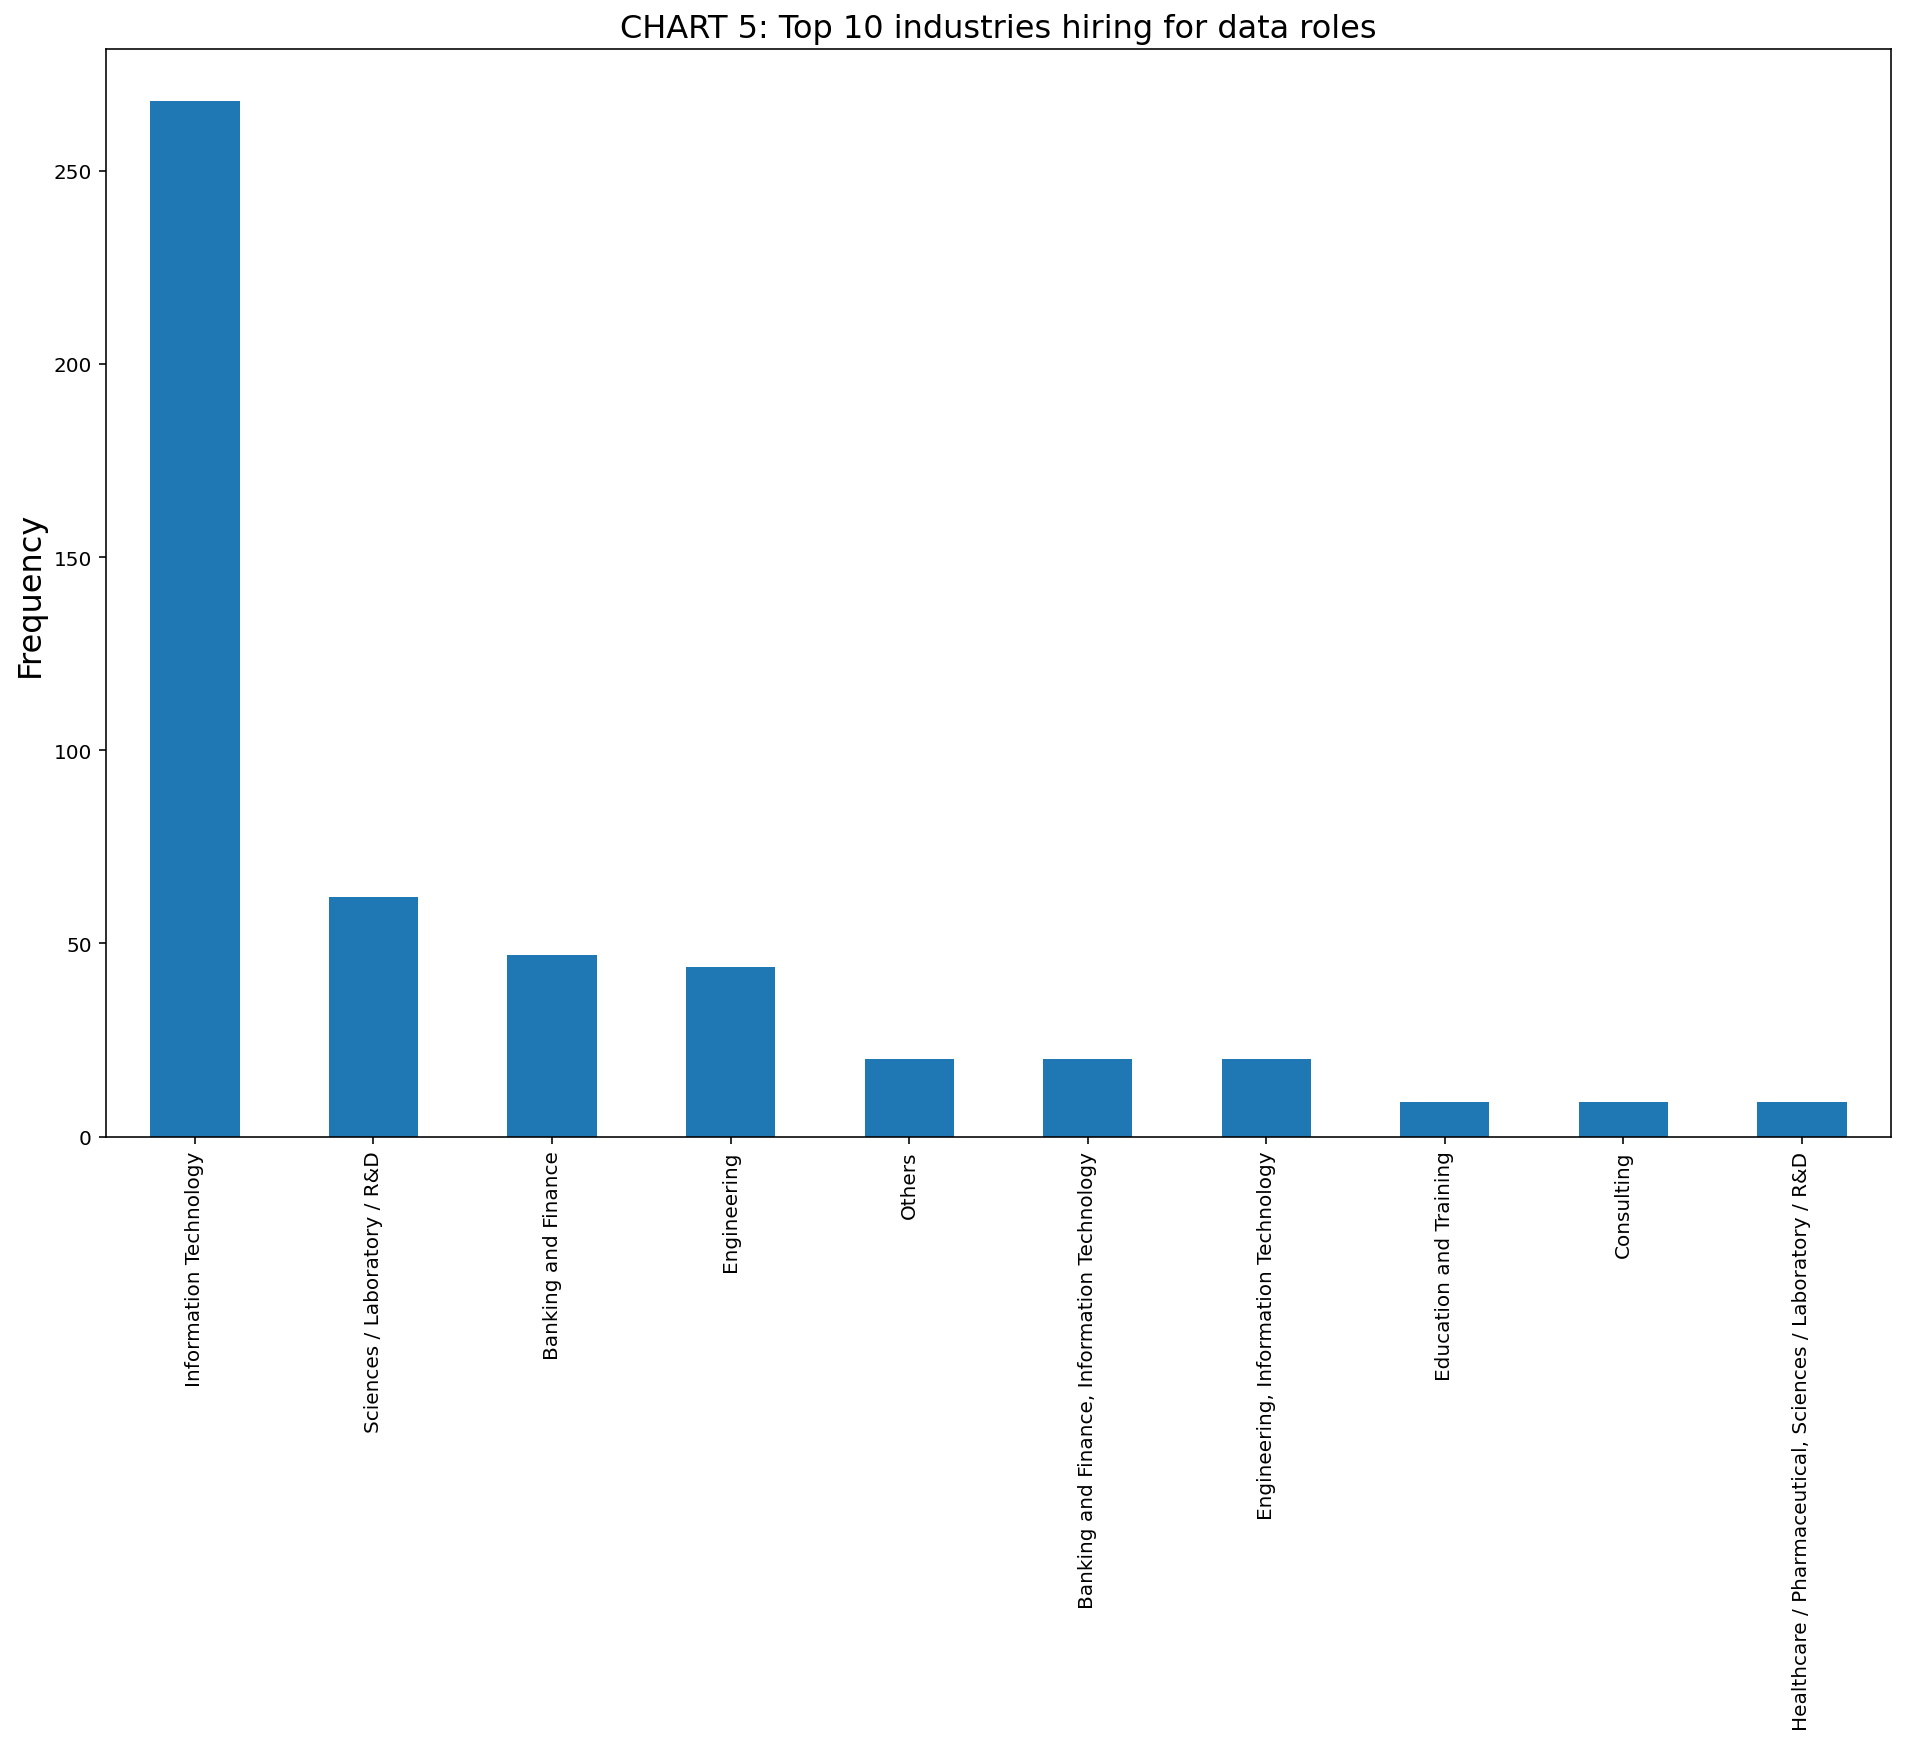

In [109]:
jobs["Category"].value_counts().plot(kind="bar", figsize=(16, 10))
plt.title(
    "CHART 5: Top 10 industries hiring for data roles", fontsize=16
)
plt.ylabel('Frequency', fontsize=16)
plt.xlim(-0.5, 9.5)
plt.show()

In [110]:
jobs[(jobs['Address'] == 'Islandwide') | (jobs['Address'] == 'CAPITAL TOWER, 168 ROBINSON ROAD 068912')]

,Title,Responsibilities,Seniority,Employment_Type,Category,Address,Salary_Min,Salary_Max
0,Job: Data Scientist (Ai / Ml ) - Contract,Roles & ResponsibilitiesRoles & Responsibiliti...,Professional,Contract,Information Technology,Islandwide,5 000,8 000
1,Job: Senior Data Scientist (Ai / Ml ) - Contract,Roles & ResponsibilitiesRoles & Responsibiliti...,Professional,Contract,Information Technology,Islandwide,6 500,9 500
2,Senior Data Scientist,Roles & ResponsibilitiesJob Summary\nCredit ev...,Professional,Permanent,Information Technology,"CAPITAL TOWER, 168 ROBINSON ROAD 068912",6 000,12 000
3,Data Scientist (Bank) (Jt),"Roles & Responsibilities1, Involved in buildin...",Professional,Contract,"Banking and Finance, Information Technology",Islandwide,7 000,8 000
10,Data Scientist (Ref 24768),Roles & ResponsibilitiesResponsibilities:\n- P...,Executive,Permanent,Information Technology,Islandwide,7 000,12 000
...,...,...,...,...,...,...,...,...
609,"#Sgunitedjobs - Software Engineer, Cellular Im...",Roles & ResponsibilitiesJOB DESCRIPTION\n\nWe ...,Non-executive,Contract,Sciences / Laboratory / R&D,Islandwide,3 000,6 000
614,Project Manager (Digital Blockchain) With Comm...,Roles & Responsibilities\n5+ years of agile Pr...,Senior Executive,Permanent,Information Technology,Islandwide,11 000,15 000
619,Assistant Manager,Roles & ResponsibilitiesJob Title: Assistant M...,Professional,"Temporary, Contract","General Management, Information Technology",Islandwide,3 500,6 500
630,Data Architect (Banking),Roles & Responsibilities\nPermanent role\nCare...,Professional,Permanent,Information Technology,Islandwide,10 000,16 500
